# L A B

In [4]:
import numpy as np

g = 9.81  # gravity force
m = 1500  # mass
lz = 3000  #
Caf = 19000  # Car front
Car = 33000  # Car right
lf = 2  # Lateral font wheel
lr = 3  # lateral right wheel
Ts = 0.02  # Time sample
x_dot = 20

A1 = -(2*Caf + 2*Car)/(m*x_dot)
A2 = -x_dot-(2*Caf*lf-2*Car*lr)/(m*x_dot)
A3 = -(2*lf*Caf-2*lr*Car)/(lz*x_dot)
A4 = -(2*lf**2*Caf+2*lr**2*Car)/(lz*x_dot)


In [17]:


A = np.array([[A1,  0, A2, 0],
              [0,  0,  1, 0],
              [A3, 0, A4, 0],
              [1, x_dot, 0, 0]])

B = np.array([[2*Caf/m], [0], [2*lf*Caf/lz], [0]])

C = np.array([[0, 1, 0, 0],
             [0, 0, 0, 1]])

D = 0

Ad = np.identity(np.size(A,1)) + Ts*A
Bd = Ts*B
Cd = C
Dd = D

A_aug = np.concatenate((Ad, Bd), axis=1)
temp1 = np.zeros((np.size(Bd,1), np.size(Ad, 1)))
temp2 = np.identity(np.size(Bd, 1))
temp = np.concatenate((temp1, temp2), axis=1)

A_aug = np.concatenate((A_aug,temp), axis=0)
B_aug = np.concatenate((Bd, np.identity(np.size(Bd, 1))), axis=0)
C_aug = np.concatenate((Cd, np.zeros((np.size(Cd, 0), np.size(Bd, 1)))), axis=1)
D_aug = Dd

np.size(A,1)

4

In [23]:
A_aug = np.concatenate((Ad, Bd), axis=1)
print(Ad)
print(Bd)
print(A_aug)

[[ 0.93066667  0.         -0.31866667  0.        ]
 [ 0.          1.          0.02        0.        ]
 [ 0.04066667  0.          0.75133333  0.        ]
 [ 0.02        0.4         0.          1.        ]]
[[0.50666667]
 [0.        ]
 [0.50666667]
 [0.        ]]
[[ 0.93066667  0.         -0.31866667  0.          0.50666667]
 [ 0.          1.          0.02        0.          0.        ]
 [ 0.04066667  0.          0.75133333  0.          0.50666667]
 [ 0.02        0.4         0.          1.          0.        ]]


TypeError: Cannot interpret '1' as a data type

In [20]:
Ad = np.identity(np.size(A, 1)) + Ts * A

In [13]:
np.size(A,1)

4

In [29]:
from numpy import linalg as LA
i = np.array([[0, 1], 
              [-1, 0]]) # matrix equiv. of the imaginary unit
LA.matrix_power(i, 3) # should = -i

array([[ 0, -1],
       [ 1,  0]])

In [27]:
LA.matrix_power(np.matrix(i), 3) # matrix arg returns matrix

In [31]:
LA.matrix_power(i, 0)

array([[1, 0],
       [0, 1]])

In [30]:
LA.matrix_power(i, -3) # should = 1/(-i) = i, but w/ f.p. elements

array([[ 0.,  1.],
       [-1.,  0.]])

In [28]:
#Somewhat more sophisticated example

q = np.zeros((4, 4))
q[0:2, 0:2] = -i
q[2:4, 2:4] = i
q # one of the three quarternion units not equal to 1

LA.matrix_power(q, 2) # = -np.eye(4)

array([[-1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.]])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1,31,2)
z = 2.5+x*0.5+np.random.randn(15)*0.5

plt.gca(xlim=[0,31])
plt.xlabel(u'เวลา (วัน)',fontname='Tahoma')
plt.ylabel(u'ปริมาณอาหาร (กก.)',fontname='Tahoma')
plt.scatter(x,z)
plt.show()

In [21]:
print(x,'num x:',len(x),'Types x:',type(x),x.shape)
print(x,'num x:',len(x),'Types z:',type(z),z.shape)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29] num x: 15 Types x: <class 'numpy.ndarray'> (15,)
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29] num x: 15 Types z: <class 'numpy.ndarray'> (15,)


In [34]:
eta = 0.0002 # อัตราการเรียนรู้
n_thamsam = 1000 # จำนวนครั้งที่ทำซ้ำเพื่อเรียนรู้
w,b = 0,0 # น้ำหนักและไบแอสเริ่มต้น
wi = [w] # ลิสต์บันทึกค่าน้ำหนักและไบแอส
bi = [b]
h = w*x+b # คำนวณคำตอบโดยใช้ w และ b ตอนแรก
for i in range(n_thamsam):
    w += 2*((z-h)*x).sum()*eta # ปรับค่าน้ำหนักและไบแอส
    b += 2*(z-h).sum()*eta
    wi += [w] #  บันทึกค่าน้ำหนักและไบแอสใหม่
    bi += [b]
    h = w*x+b # คำนวณคำตอบโดยใช้ค่า w และ b ใหม่
print(wi)

[0, 1.1393800778374008, 0.2246875815211523, 0.958406781175211, 0.3692616706992409, 0.8417272283591437, 0.462241430894764, 0.7664545355313179, 0.5219937807023053, 0.7178490840583452, 0.560347387142583, 0.686418259389929, 0.5849201505914454, 0.666048624049208, 0.6006181522893989, 0.652802999147863, 0.6106010069453258, 0.6441457604794781, 0.6169035693963725, 0.6384439134880425, 0.6208363263088242, 0.6346457754264817, 0.6232432565557888, 0.6320740401485014, 0.6246678985313604, 0.6302925076366445, 0.6254603008697657, 0.6290202551148308, 0.6258459008780825, 0.6280763615037013, 0.6259698836441653, 0.6273443088485321, 0.6259257502020076, 0.6267490561166503, 0.6257737160097564, 0.6262422742578795, 0.6255525599427761, 0.6257928372839359, 0.6252872552855393, 0.6253806983306528, 0.6249938842451959, 0.6249929457178123, 0.6246828029979994, 0.6246212629716614, 0.6243606800434004, 0.6242602930278762, 0.624031808945423, 0.6239065847450782, 0.6236989537647321, 0.6235579144381574, 0.6233638935340258, 0.6

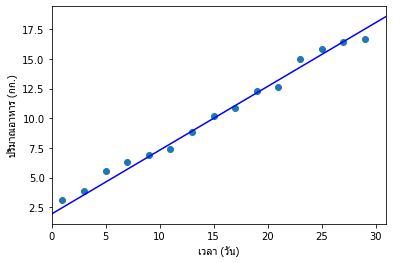

In [24]:
plt.gca(xlim=[0,31])
plt.xlabel(u'เวลา (วัน)',fontname='Tahoma')
plt.ylabel(u'ปริมาณอาหาร (กก.)',fontname='Tahoma')
plt.scatter(x,z)
xsen = np.array([0,31])
ysen = xsen*w+b
plt.plot(xsen,ysen,'b')
plt.show()

In [28]:
print(x,type(x))

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29] <class 'numpy.ndarray'>


In [29]:
print(z,type(z))

[ 3.11779912  3.86765544  5.52377873  6.33203667  6.8796208   7.44750483
  8.8240407  10.19326119 10.88129864 12.28749493 12.61099207 14.96827179
 15.84005278 16.44971651 16.64298141] <class 'numpy.ndarray'>


In [30]:
print(w)

0.5369602844249483


In [31]:
print(b)

1.9329631803343368
